In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("loan_data.csv")

In [3]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [4]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


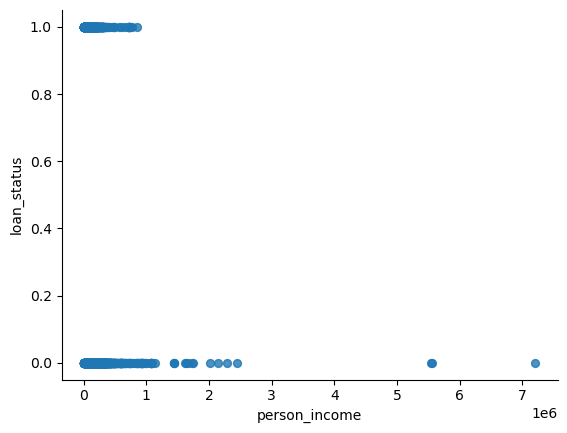

In [5]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='person_income', y='loan_status', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
# /////////////////

In [7]:
df['loan_amnt'].corr(df['loan_status'])

0.1077144669813284

In [8]:
df['person_gender'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [10]:
df['person_gender_encod'] = df['person_gender'].map({'female': 0, 'male': 1})

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
person_education_encoder = OrdinalEncoder(categories=[['Master','High School', 'Bachelor', 'Associate', 'Doctorate']])
df['Person_Encoder'] =person_education_encoder.fit_transform(df[['person_education']])

In [13]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [14]:
person_home_encoder = OrdinalEncoder(categories=[['RENT', 'OWN', 'MORTGAGE', 'OTHER']])
df['Person_Home_Ownership_Encoder'] =person_home_encoder.fit_transform(df[['person_home_ownership']])

In [15]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [16]:
loan_intent_encoder = OrdinalEncoder(categories=[['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       # 'DEBTCONSOLIDATION']])
df['Loan_intent_Encoder'] =loan_intent_encoder .fit_transform(df[['loan_intent']])

In [17]:
df['previous_loan_defaults_on_file'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
df['previous_loan_default_on_file_encod'] = df['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})

In [ ]:
feature_names = ["previous_loan_defaults", "loan_percent_income", "loan_int_rate", "loan_amnt", "person_income", "home_ownership"]
coefficients = model.coef_[0]

# Plot feature importance
plt.figure(figsize=(6, 4))
sns.barplot(x=coefficients, y=feature_names, palette="viridis")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Logistic Regression)")
plt.show()

In [19]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_encod,Person_Encoder,Person_Home_Ownership_Encoder,Loan_intent_Encoder,previous_loan_default_on_file_encod
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222,0.552022,1.718622,0.895111,2.323622,0.507956
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744,0.497292,1.062934,0.965008,1.672702,0.499942
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000,1.000000,3.000000,2.000000,4.000000,1.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000,1.000000,4.000000,3.000000,5.000000,1.000000


In [20]:
df[['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status', 'person_gender_encod', 'Person_Encoder', 'Person_Home_Ownership_Encoder', 'Loan_intent_Encoder', 'previous_loan_default_on_file_encod']].corr()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_encod,Person_Encoder,Person_Home_Ownership_Encoder,Loan_intent_Encoder,previous_loan_default_on_file_encod
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.021476,0.017528,0.052794,0.037847,0.028694,-0.025917
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,-0.135808,0.010173,0.002908,0.216077,0.014983,0.061483
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481,0.015078,0.048639,0.035354,0.020855,-0.029231
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714,0.010647,0.004241,0.148561,0.017300,-0.059009
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005,0.003662,-0.000525,-0.129622,0.014161,-0.181800
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880,-0.000367,0.007172,-0.142674,-0.002695,-0.203252
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851,0.011999,0.052224,0.028744,0.019566,-0.022640
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647,-0.000223,-0.015531,0.005715,0.002044,-0.183005
loan_status,-0.021476,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000,-0.000561,0.001950,-0.239517,0.073588,-0.543096
person_gender_encod,0.017528,0.010173,0.015078,0.010647,0.003662,-0.000367,0.011999,-0.000223,-0.000561,1.000000,0.003099,0.001507,0.002883,0.000704


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled=scaler.fit_transform(X_train[["person_income","loan_amnt","loan_int_rate","previous_loan_default_on_file_encod"]])
X_test_scaled=scaler.transform(X_test[["person_income","loan_amnt","loan_int_rate","previous_loan_default_on_file_encod"]])

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df[["person_income","loan_amnt","loan_int_rate","previous_loan_default_on_file_encod"]]
y = df["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
model.score(X_test, y_test)

0.8774444444444445

In [48]:
y_predict = model.predict(X_test)

In [49]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
# Get probabilities for each class
probabilities = model.predict_proba(X_test)

In [51]:
probabilities

array([[9.99850515e-01, 1.49484974e-04],
       [9.99870589e-01, 1.29410771e-04],
       [5.76736000e-01, 4.23264000e-01],
       ...,
       [9.99999311e-01, 6.89149332e-07],
       [6.07539173e-01, 3.92460827e-01],
       [9.34868612e-01, 6.51313882e-02]])

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
report  = classification_report(y_test, y_predict)

In [54]:
print(report)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      7013
           1       0.72      0.72      0.72      1987

    accuracy                           0.88      9000
   macro avg       0.82      0.82      0.82      9000
weighted avg       0.88      0.88      0.88      9000



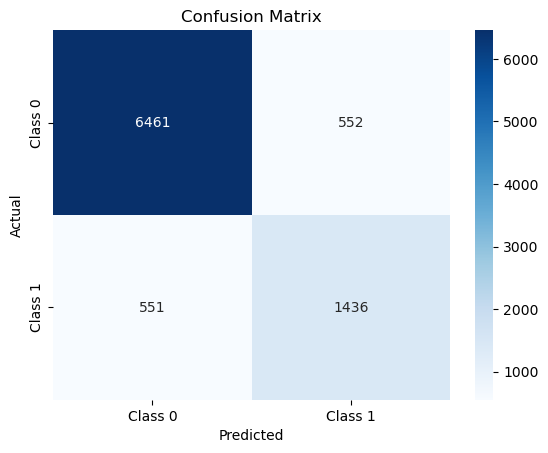

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [56]:
model.intercept_

array([-2.78614762])

In [57]:
model.coef_

array([[-2.52818341e-05,  9.66914357e-05,  2.88701522e-01,
        -7.52854931e+00]])

In [59]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_gender_encod,Person_Encoder,Person_Home_Ownership_Encoder,Loan_intent_Encoder,previous_loan_default_on_file_encod
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,0,0.0,0.0,0.0,0
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,0,1.0,1.0,1.0,1
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,0,1.0,2.0,2.0,0
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,0,2.0,0.0,2.0,0
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,1,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1,1,3.0,0.0,2.0,0
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1,0,3.0,0.0,4.0,0
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1,1,3.0,0.0,5.0,0
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1,1,2.0,0.0,1.0,0
